# AkShare 量化交易入门教程

本教程将带您学习如何使用AkShare库进行A股数据获取和量化分析。

## 学习目标
- 安装和配置AkShare
- 获取A股实时和历史数据
- 进行基础的数据处理和分析
- 计算技术指标
- 创建可视化图表
- 进行简单的量化策略分析

## 1. 环境准备和安装

In [1]:
# 安装必要的库
!pip install akshare pandas numpy matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 导入必要的库
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

print("环境准备完成！")

C:\Users\Jinze Wang\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


环境准备完成！


## 2. 获取A股实时行情数据

https://akshare.akfamily.xyz/

In [3]:
# 获取沪深A股实时行情
print("正在获取A股实时行情数据...")
stock_zh_a_spot_df = ak.stock_zh_a_spot()
print(f"成功获取 {len(stock_zh_a_spot_df)} 只股票的数据")
print("\n数据预览：")
stock_zh_a_spot_df.head()

正在获取A股实时行情数据...


Please wait for a moment:   0%|          | 0/68 [00:00<?, ?it/s]

成功获取 5417 只股票的数据

数据预览：


,代码,名称,最新价,涨跌额,涨跌幅,买入,卖出,昨收,今开,最高,最低,成交量,成交额,时间戳
0,bj430017,星昊医药,24.21,0.01,0.041,24.21,24.22,24.20,24.00,24.74,23.60,8102391.0,195192182.0,15:30:00
1,bj430047,诺思兰德,23.06,1.15,5.249,23.05,23.06,21.91,21.79,23.88,21.65,14626352.0,337767694.0,15:30:00
2,bj430090,同辉信息,10.95,0.85,8.416,10.94,10.95,10.10,10.25,11.62,10.00,54587013.0,594611757.0,15:30:00
3,bj430139,华岭股份,25.60,-0.70,-2.662,25.59,25.60,26.30,26.01,26.49,25.31,8521018.0,219925462.0,15:30:00
4,bj430198,微创光电,13.39,-0.26,-1.905,13.39,13.40,13.65,13.67,13.77,13.37,2348866.0,31792267.0,15:30:00


In [4]:
# 查看数据基本信息
print("数据基本信息：")
print(f"数据形状: {stock_zh_a_spot_df.shape}")
print(f"列名: {list(stock_zh_a_spot_df.columns)}")
print("\n数据类型：")
print(stock_zh_a_spot_df.dtypes)

数据基本信息：
数据形状: (5417, 14)
列名: ['代码', '名称', '最新价', '涨跌额', '涨跌幅', '买入', '卖出', '昨收', '今开', '最高', '最低', '成交量', '成交额', '时间戳']

数据类型：
代码      object
名称      object
最新价    float64
涨跌额    float64
涨跌幅    float64
买入     float64
卖出     float64
昨收     float64
今开     float64
最高     float64
最低     float64
成交量    float64
成交额    float64
时间戳     object
dtype: object


In [4]:
# 筛选涨幅前10的股票
top_gainers = stock_zh_a_spot_df.nlargest(10, '最新价')
print("价格前10的股票：")
print(top_gainers[['代码', '名称', '最新价', '涨跌幅', '涨跌额']])

价格前10的股票：
            代码    名称      最新价    涨跌幅    涨跌额
651   sh600519  贵州茅台  1422.22  0.468   6.62
2183  sh688256   寒武纪   547.47  0.031   0.17
72    bj832982  锦波生物   381.00 -2.300  -8.97
3420  sz002371  北方华创   335.15  2.127   6.98
1571  sh603444   吉比特   333.73  3.319  10.72
3627  sz002594   比亚迪   331.00 -1.064  -3.56
1950  sh605499  东鹏饮料   309.35  0.432   1.33
2357  sh688506  百利天恒   307.15  3.070   9.15
2447  sh688617  惠泰医疗   291.43 -1.002  -2.95
1986  sh688027  国盾量子   271.06 -0.302  -0.82


## 3. 获取单只股票历史数据

In [5]:
# 获取平安银行(000001)的历史数据
symbol = "000001"
start_date = "20230101"
end_date = "20231231"

print(f"正在获取 {symbol} 的历史数据...")
stock_hist_df = ak.stock_zh_a_hist(symbol=symbol, period="daily", 
                                   start_date=start_date, end_date=end_date)
print(f"成功获取 {len(stock_hist_df)} 条历史数据")
print("\n数据预览：")
stock_hist_df.head()

正在获取 000001 的历史数据...
成功获取 242 条历史数据

数据预览：


,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2023-01-03,000001,13.20,13.77,13.85,13.05,2194128,2.971547e+09,6.08,4.64,0.61,1.13
1,2023-01-04,000001,13.71,14.32,14.42,13.63,2189683,3.110729e+09,5.74,3.99,0.55,1.13
2,2023-01-05,000001,14.40,14.48,14.74,14.37,1665425,2.417272e+09,2.58,1.12,0.16,0.86
3,2023-01-06,000001,14.50,14.62,14.72,14.48,1195745,1.747915e+09,1.66,0.97,0.14,0.62
4,2023-01-09,000001,14.75,14.80,14.88,14.52,1057659,1.561368e+09,2.46,1.23,0.18,0.55


In [7]:
stock_hist_df.dtypes

日期       object
股票代码     object
开盘      float64
收盘      float64
最高      float64
最低      float64
成交量       int64
成交额     float64
振幅      float64
涨跌幅     float64
涨跌额     float64
换手率     float64
dtype: object

In [ ]:
# inplace=True  --- 直接对原有dataframe进行修改 
# inplace=False --- 创建一个新的dataframe,进行修改后返回新的dataframe,原有dataframe不变

In [9]:
# 数据预处理
stock_hist_df['日期'] = pd.to_datetime(stock_hist_df['日期'])
stock_hist_df = stock_hist_df.sort_values('日期')
stock_hist_df.set_index('日期', inplace=True)

# 转换数据类型
numeric_columns = ['开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅', '涨跌额', '换手率']
for col in numeric_columns:
    if col in stock_hist_df.columns:
        stock_hist_df[col] = pd.to_numeric(stock_hist_df[col], errors='coerce')

print("数据预处理完成！")
print("\n处理后的数据：")
stock_hist_df.head()

数据预处理完成！

处理后的数据：


,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2023-01-03,000001,13.20,13.77,13.85,13.05,2194128,2.971547e+09,6.08,4.64,0.61,1.13
2023-01-04,000001,13.71,14.32,14.42,13.63,2189683,3.110729e+09,5.74,3.99,0.55,1.13
2023-01-05,000001,14.40,14.48,14.74,14.37,1665425,2.417272e+09,2.58,1.12,0.16,0.86
2023-01-06,000001,14.50,14.62,14.72,14.48,1195745,1.747915e+09,1.66,0.97,0.14,0.62
2023-01-09,000001,14.75,14.80,14.88,14.52,1057659,1.561368e+09,2.46,1.23,0.18,0.55


<Axes: xlabel='日期'>

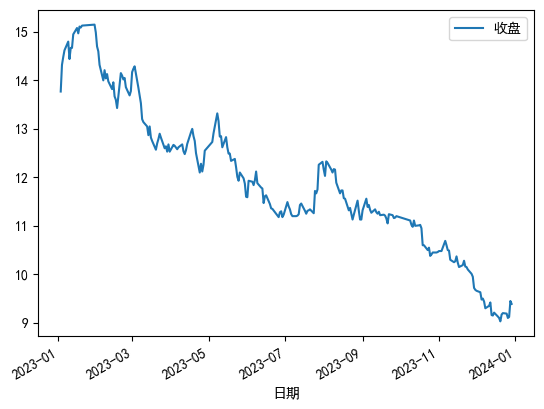

In [ ]:
# plot the stock price
stock_hist_df.reset_index().plot(x='日期' , y='收盘')

## 4. 基础技术分析

In [8]:
# 计算移动平均线
def calculate_ma(data, periods=[5, 10, 20, 60]):
    """计算移动平均线"""
    for period in periods:
        data[f'MA{period}'] = data['收盘'].rolling(window=period).mean()
    return data

# 计算技术指标
def calculate_technical_indicators(data):
    """计算技术指标"""
    # 计算移动平均线
    data = calculate_ma(data)
    
    # 计算RSI (相对强弱指数)
    delta = data['收盘'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # 计算MACD
    exp1 = data['收盘'].ewm(span=12).mean()
    exp2 = data['收盘'].ewm(span=26).mean()
    data['MACD'] = exp1 - exp2
    data['MACD_Signal'] = data['MACD'].ewm(span=9).mean()
    data['MACD_Histogram'] = data['MACD'] - data['MACD_Signal']
    
    # 计算布林带
    data['BB_Middle'] = data['收盘'].rolling(window=20).mean()
    bb_std = data['收盘'].rolling(window=20).std()
    data['BB_Upper'] = data['BB_Middle'] + (bb_std * 2)
    data['BB_Lower'] = data['BB_Middle'] - (bb_std * 2)
    
    return data

# 应用技术指标
stock_hist_df = calculate_technical_indicators(stock_hist_df)
print("技术指标计算完成！")
print("\n包含技术指标的数据：")
stock_hist_df.tail()

技术指标计算完成！

包含技术指标的数据：


,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,...,MA10,MA20,MA60,RSI,MACD,MACD_Signal,MACD_Histogram,BB_Middle,BB_Upper,BB_Lower
日期,,,,,,,,,,,,,,,,,,,,,
2023-12-25,000001,9.18,9.19,9.20,9.14,413971,3.796382e+08,0.65,-0.11,-0.01,...,9.176,9.3735,10.183500,35.922330,-0.270113,-0.293348,0.023235,9.3735,9.878976,8.868024
2023-12-26,000001,9.19,9.10,9.20,9.07,541896,4.937466e+08,1.41,-0.98,-0.09,...,9.144,9.3310,10.148167,31.818182,-0.262174,-0.287113,0.024939,9.3310,9.771091,8.890909
2023-12-27,000001,9.10,9.12,9.13,9.02,641534,5.820367e+08,1.21,0.22,0.02,...,9.140,9.3010,10.114167,34.905660,-0.251372,-0.279965,0.028594,9.3010,9.710153,8.891847
2023-12-28,000001,9.11,9.45,9.47,9.08,1661592,1.550257e+09,4.28,3.62,0.33,...,9.170,9.2895,10.085500,56.000000,-0.213718,-0.266716,0.052997,9.2895,9.665377,8.913623
2023-12-29,000001,9.42,9.39,9.48,9.35,853853,8.031967e+08,1.38,-0.63,-0.06,...,9.188,9.2760,10.055333,51.587302,-0.186569,-0.250686,0.064118,9.2760,9.613258,8.938742


## 5. 数据可视化

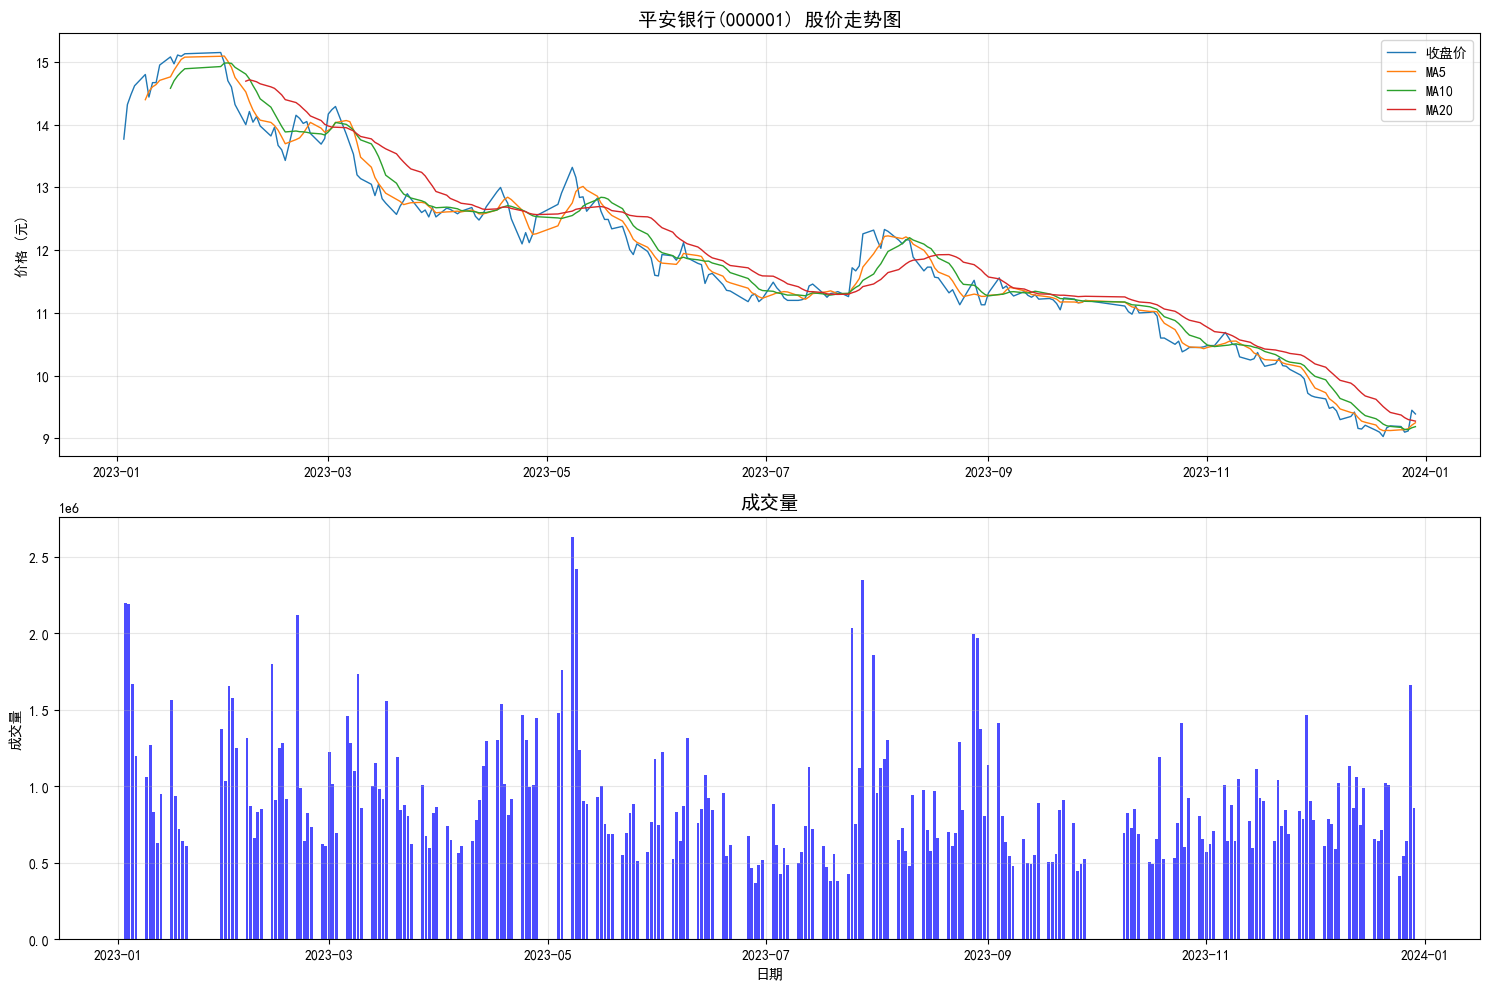

In [22]:
# 创建K线图和移动平均线
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 上图：K线图和移动平均线
ax1.plot(stock_hist_df.index, stock_hist_df['收盘'], label='收盘价', linewidth=1)
ax1.plot(stock_hist_df.index, stock_hist_df['MA5'], label='MA5', linewidth=1)
ax1.plot(stock_hist_df.index, stock_hist_df['MA10'], label='MA10', linewidth=1)
ax1.plot(stock_hist_df.index, stock_hist_df['MA20'], label='MA20', linewidth=1)
# ax1.plot(stock_hist_df.index, stock_hist_df['BB_Upper'], label='布林带上轨', linestyle='--', alpha=0.7)
# ax1.plot(stock_hist_df.index, stock_hist_df['BB_Lower'], label='布林带下轨', linestyle='--', alpha=0.7)
# ax1.fill_between(stock_hist_df.index, stock_hist_df['BB_Upper'], stock_hist_df['BB_Lower'], alpha=0.1)

ax1.set_title('平安银行(000001) 股价走势图', fontsize=14)
ax1.set_ylabel('价格 (元)')

ax1.grid(True, alpha=0.3)
# 标记金叉和死叉
# ax1.scatter(stock_hist_df.index, stock_hist_df['MA5'], label='金叉', marker='^', color='green', alpha=0.7)
# ax1.scatter(stock_hist_df.index, stock_hist_df['MA5'], label='死叉', marker='v', color='red', alpha=0.7)
ax1.legend()


# 下图：成交量
ax2.bar(stock_hist_df.index, stock_hist_df['成交量'], alpha=0.7, color='blue')
ax2.set_title('成交量', fontsize=14)
ax2.set_ylabel('成交量')
ax2.set_xlabel('日期')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

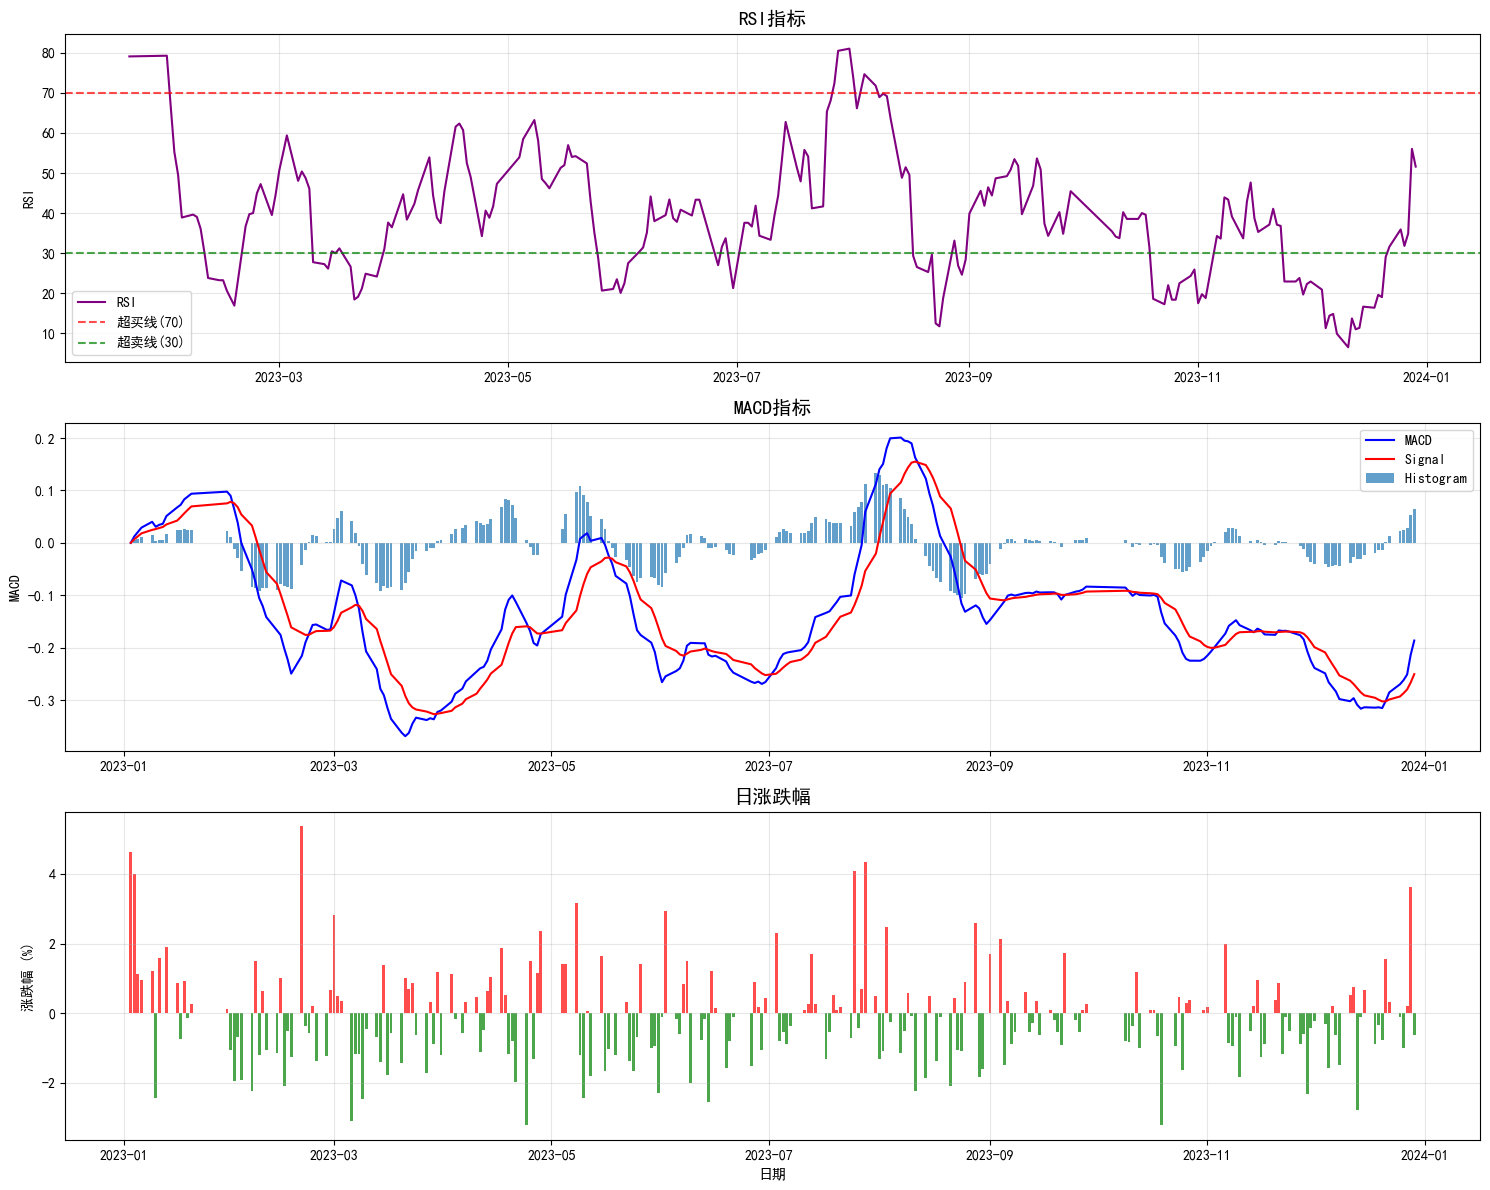

In [10]:
# 绘制技术指标
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# RSI指标
ax1.plot(stock_hist_df.index, stock_hist_df['RSI'], label='RSI', color='purple')
ax1.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='超买线(70)')
ax1.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='超卖线(30)')
ax1.set_title('RSI指标', fontsize=14)
ax1.set_ylabel('RSI')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MACD指标
ax2.plot(stock_hist_df.index, stock_hist_df['MACD'], label='MACD', color='blue')
ax2.plot(stock_hist_df.index, stock_hist_df['MACD_Signal'], label='Signal', color='red')
ax2.bar(stock_hist_df.index, stock_hist_df['MACD_Histogram'], label='Histogram', alpha=0.7)
ax2.set_title('MACD指标', fontsize=14)
ax2.set_ylabel('MACD')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 涨跌幅
colors = ['red' if x > 0 else 'green' for x in stock_hist_df['涨跌幅']]
ax3.bar(stock_hist_df.index, stock_hist_df['涨跌幅'], color=colors, alpha=0.7)
ax3.set_title('日涨跌幅', fontsize=14)
ax3.set_ylabel('涨跌幅 (%)')
ax3.set_xlabel('日期')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. 多股票对比分析

In [11]:
# 获取多只股票数据进行对比
stocks = {
    '000001': '平安银行',
    '000002': '万科A',
    '000858': '五粮液',
    '002415': '海康威视'
}

stock_data = {}
for symbol, name in stocks.items():
    print(f"正在获取 {name}({symbol}) 的数据...")
    try:
        data = ak.stock_zh_a_hist(symbol=symbol, period="daily", 
                                  start_date=start_date, end_date=end_date)
        data['日期'] = pd.to_datetime(data['日期'])
        data['收盘'] = pd.to_numeric(data['收盘'], errors='coerce')
        stock_data[name] = data.set_index('日期')['收盘']
    except Exception as e:
        print(f"获取 {name} 数据失败: {e}")

# 创建DataFrame
stock_df = pd.DataFrame(stock_data)
print("\n多股票数据获取完成！")
stock_df.head()

正在获取 平安银行(000001) 的数据...
正在获取 万科A(000002) 的数据...
正在获取 五粮液(000858) 的数据...
正在获取 海康威视(002415) 的数据...

多股票数据获取完成！


,平安银行,万科A,五粮液,海康威视
日期,,,,
2023-01-03,13.77,18.23,178.20,34.29
2023-01-04,14.32,19.07,178.62,33.92
2023-01-05,14.48,19.33,189.00,34.35
2023-01-06,14.62,19.22,190.46,33.75
2023-01-09,14.80,18.78,195.88,33.07


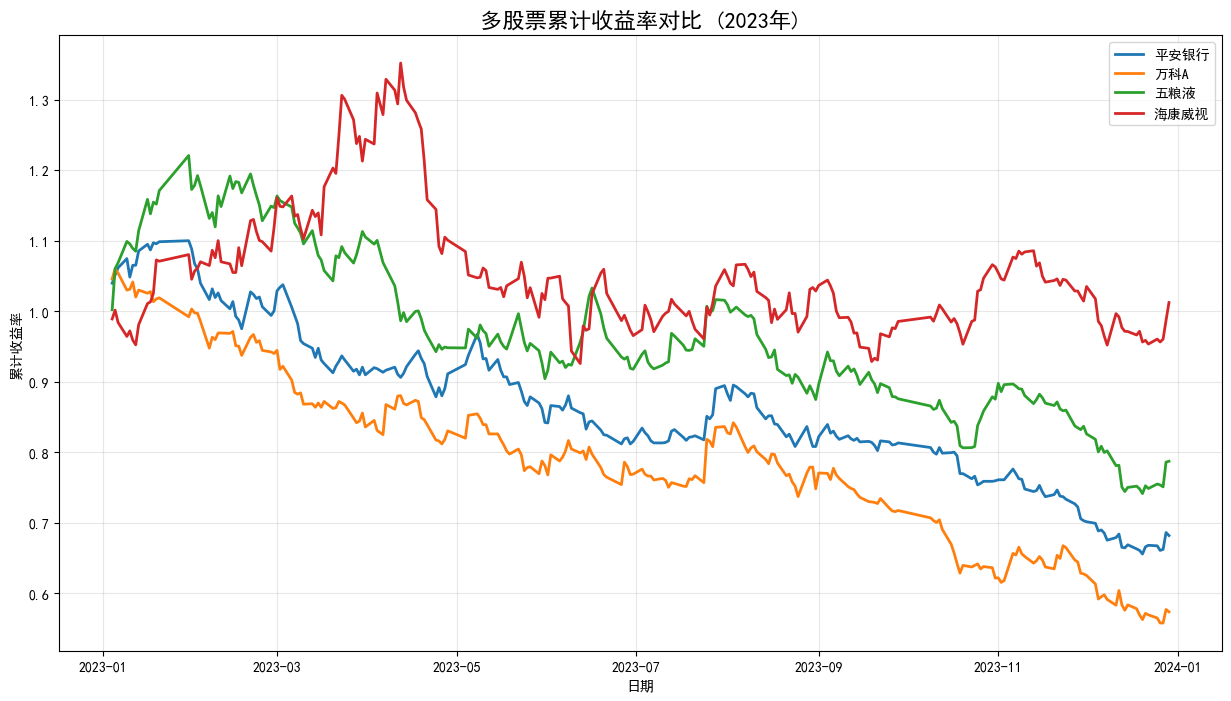


股票表现对比：
       年化收益率   年化波动率    夏普比率
平安银行 -0.3777  0.2124 -1.7783
万科A  -0.5464  0.2619 -2.0861
五粮液  -0.2134  0.2715 -0.7862
海康威视  0.0662  0.3281  0.2019


In [12]:
# 计算收益率进行对比
returns_df = stock_df.pct_change()
cumulative_returns = (1 + returns_df).cumprod()

# 绘制累计收益率对比图
plt.figure(figsize=(15, 8))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linewidth=2)

plt.title('多股票累计收益率对比 (2023年)', fontsize=16)
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 计算年化收益率和波动率
annual_returns = returns_df.mean() * 252
annual_volatility = returns_df.std() * np.sqrt(252)

performance_summary = pd.DataFrame({
    '年化收益率': annual_returns,
    '年化波动率': annual_volatility,
    '夏普比率': annual_returns / annual_volatility
})

print("\n股票表现对比：")
print(performance_summary.round(4))

## 7. 简单的量化策略示例

双均线策略回测完成！

策略表现：
买入持有收益率: -31.81%
策略收益率: -3.77%


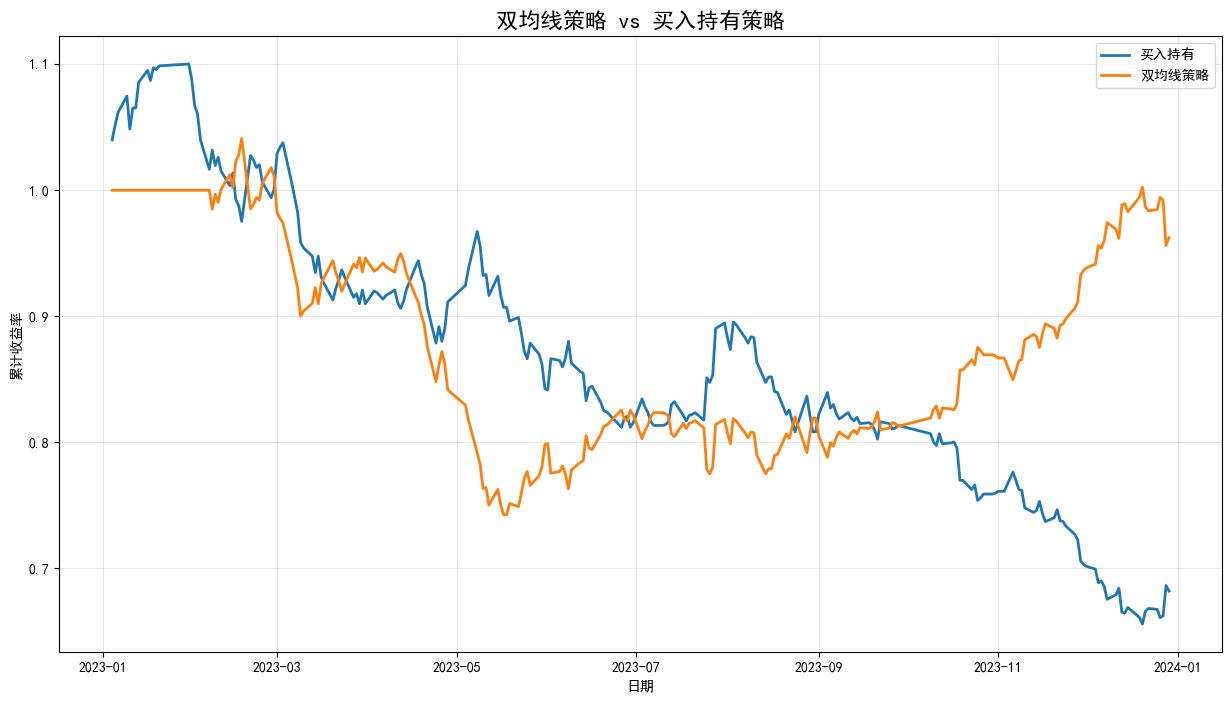

In [13]:
# 双均线策略示例
def dual_ma_strategy(data, short_window=5, long_window=20):
    """双均线策略"""
    # 计算短期和长期移动平均线
    data[f'MA{short_window}'] = data['收盘'].rolling(window=short_window).mean()
    data[f'MA{long_window}'] = data['收盘'].rolling(window=long_window).mean()
    
    # 生成交易信号
    data['Signal'] = 0
    data.loc[data[f'MA{short_window}'] > data[f'MA{long_window}'], 'Signal'] = 1  # 买入信号
    data.loc[data[f'MA{short_window}'] < data[f'MA{long_window}'], 'Signal'] = -1  # 卖出信号
    
    # 计算策略收益率
    data['Strategy_Return'] = data['Signal'].shift(1) * data['收盘'].pct_change()
    
    return data

# 应用策略到平安银行数据
strategy_data = stock_hist_df[['收盘']].copy()
strategy_data = dual_ma_strategy(strategy_data)

# 计算累计收益率
strategy_data['Cumulative_Return'] = (1 + strategy_data['收盘'].pct_change()).cumprod()
strategy_data['Strategy_Cumulative_Return'] = (1 + strategy_data['Strategy_Return']).cumprod()

print("双均线策略回测完成！")
print("\n策略表现：")
print(f"买入持有收益率: {(strategy_data['Cumulative_Return'].iloc[-1] - 1) * 100:.2f}%")
print(f"策略收益率: {(strategy_data['Strategy_Cumulative_Return'].iloc[-1] - 1) * 100:.2f}%")

# 绘制策略对比图
plt.figure(figsize=(15, 8))
plt.plot(strategy_data.index, strategy_data['Cumulative_Return'], label='买入持有', linewidth=2)
plt.plot(strategy_data.index, strategy_data['Strategy_Cumulative_Return'], label='双均线策略', linewidth=2)
plt.title('双均线策略 vs 买入持有策略', fontsize=16)
plt.xlabel('日期')
plt.ylabel('累计收益率')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 8. 获取其他金融数据

In [14]:
# 获取指数数据
print("获取上证指数数据...")
index_data = ak.stock_zh_index_daily(symbol="sh000001")
print("上证指数数据预览：")
index_data.head()

获取上证指数数据...
上证指数数据预览：


,date,open,high,low,close,volume
0,1990-12-19,96.05,99.98,95.79,99.98,126000
1,1990-12-20,104.30,104.39,99.98,104.39,19700
2,1990-12-21,109.07,109.13,103.73,109.13,2800
3,1990-12-24,113.57,114.55,109.13,114.55,3200
4,1990-12-25,120.09,120.25,114.55,120.25,1500


In [15]:
# 获取行业板块数据
print("获取行业板块数据...")
sector_data = ak.stock_board_industry_name_em()
print("行业板块数据预览：")
sector_data.head()

获取行业板块数据...


0it [00:00, ?it/s]

行业板块数据预览：


,排名,板块名称,板块代码,最新价,涨跌额,涨跌幅,总市值,换手率,上涨家数,下跌家数,领涨股票,领涨股票-涨跌幅
0,1,银行,BK0475,4500.76,72.90,1.65,15956943360000,0.35,42,0,中信银行,3.73
1,2,游戏,BK1046,1401.64,20.97,1.52,453819632000,4.80,17,8,巨人网络,9.07
2,3,公用事业,BK0427,8457.58,122.18,1.47,188082619000,1.25,13,9,新中港,10.05
3,4,电力行业,BK0428,17074.70,231.05,1.37,3265720864000,1.29,67,11,韶能股份,10.10
4,5,多元金融,BK0738,644.61,5.61,0.88,446804224000,2.23,17,3,弘业期货,3.62


In [16]:
# 获取基金数据
print("获取基金数据...")
fund_data = ak.fund_em_open_fund_info(fund="000001", indicator="单位净值走势")
print("基金数据预览：")
fund_data.head()

获取基金数据...


type: module 'akshare' has no attribute 'fund_em_open_fund_info'

## 9. 总结和进阶建议

### 本教程涵盖的内容：
1. ✅ AkShare库的安装和配置
2. ✅ A股实时行情数据获取
3. ✅ 历史数据获取和预处理
4. ✅ 技术指标计算（MA、RSI、MACD、布林带）
5. ✅ 数据可视化（K线图、技术指标图）
6. ✅ 多股票对比分析
7. ✅ 简单量化策略实现
8. ✅ 其他金融数据获取

### 进阶学习建议：
1. **深入学习技术分析**：学习更多技术指标和形态识别
2. **策略优化**：使用机器学习方法优化交易策略
3. **风险管理**：学习仓位管理和风险控制
4. **回测框架**：使用专业的回测框架如Backtrader
5. **实时交易**：学习如何连接券商API进行实盘交易

### 常用AkShare功能：
- `ak.stock_zh_a_spot()` - A股实时行情
- `ak.stock_zh_a_hist()` - A股历史数据
- `ak.stock_zh_index_daily()` - 指数数据
- `ak.stock_board_industry_name_em()` - 行业板块
- `ak.fund_em_open_fund_info()` - 基金数据
- `ak.futures_zh_daily_sina()` - 期货数据
- `ak.option_zh_a_spot()` - 期权数据

### 注意事项：
1. 数据获取可能有延迟，建议在交易时间外进行大量数据获取
2. 部分数据需要网络连接
3. 请遵守相关法律法规，仅用于学习和研究目的
4. 实盘交易需要谨慎，建议先进行充分的回测和模拟交易